# Análisis de las características de la muestra.

In [122]:
# Lectura de datos
# ==============================================================================
import pickle

# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import sidetable

# Librerías para manejar fechas
# ==============================================================================
from datetime import datetime
import calendar

# Desplegar todas las columnas
# ==============================================================================
pd.options.display.max_columns = None

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Test de Shapiro
# ==============================================================================
from scipy import stats

# Asimetría
# ==============================================================================
from scipy.stats import skew

# Curtosis
# ==============================================================================
from scipy.stats import kurtosistest

# Test de Levene
# ==============================================================================
from scipy.stats import levene

# Configuración warnings
# ==============================================================================
#import warnings
#warnings.filterwarnings('ignore')

# Tamaño gráficas
# ==============================================================================
plt.rcParams["figure.figsize"] = (10,8)

In [123]:
df = pd.read_pickle('datos/1.bikes_limpio.pkl')
#df = pd.read_csv('datos/1.bikes_limpio.csv', index_col=0)
df.head(3)

,dteday,seasons,yr,mnth,holiday_num,weekday_num,weekday_cat,workingday_num,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2018-01-01,winter,0,1,1,0,monday,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
2,2018-01-02,winter,0,1,0,1,tuesday,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
3,2018-01-03,winter,0,1,0,2,wednesday,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
4,2018-01-04,winter,0,1,0,3,thursday,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
5,2018-01-05,winter,0,1,0,4,friday,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
6,2018-01-06,winter,0,1,0,5,saturday,0,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
7,2018-01-07,winter,0,1,0,6,sunday,0,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
8,2018-01-08,winter,0,1,0,0,monday,1,2,6.765000,8.11270,53.5833,17.875868,68,891,959
9,2018-01-09,winter,0,1,0,1,tuesday,1,1,5.671653,5.80875,43.4167,24.250650,54,768,822


In [124]:
df_registered = pd.read_pickle('datos/1.registrados.pkl')
#df_registered = pd.read_csv('datos/1.registrados.csv', index_col=0)
df_registered.head(3)

,dteday,seasons,yr,mnth,holiday_num,weekday_num,weekday_cat,workingday_num,weathersit,temp,atemp,hum,windspeed,registered,cnt
instant,,,,,,,,,,,,,,,
1,2018-01-01,winter,0,1,1,0,monday,0,2,14.110847,18.18125,80.5833,10.749882,654,985
2,2018-01-02,winter,0,1,0,1,tuesday,1,2,14.902598,17.68695,69.6087,16.652113,670,801
3,2018-01-03,winter,0,1,0,2,wednesday,1,1,8.050924,9.47025,43.7273,16.636703,1229,1349


In [125]:
df_casual = pd.read_pickle('datos/1.casuales.pkl')
#df_casual = pd.read_csv('datos/1.casuales.csv', index_col=0)
df_casual.head(3)

,dteday,seasons,yr,mnth,holiday_num,weekday_num,weekday_cat,workingday_num,weathersit,temp,atemp,hum,windspeed,casual,cnt
instant,,,,,,,,,,,,,,,
1,2018-01-01,winter,0,1,1,0,monday,0,2,14.110847,18.18125,80.5833,10.749882,331,985
2,2018-01-02,winter,0,1,0,1,tuesday,1,2,14.902598,17.68695,69.6087,16.652113,131,801
3,2018-01-03,winter,0,1,0,2,wednesday,1,1,8.050924,9.47025,43.7273,16.636703,120,1349


`Como se mencionó anteriormente, se ha decidido construir un modelo para predecir el número de bicicletas que alquilan por día los usuarios registrados y otro para los usuarios casuales. En esta sección presentaremos tanto un análisis gráfico como un análisis analítico de los test estadísticos para validar o rechazar las hipótesis o preguntas que nos planteamos, ¿existe relación significativa entre las variables?¿cómo es esa relación?`

## Exploración de las características de la muestra:

Es importante saber cómo se distribuye la muestra con la que estamos trabajando (normalidad, asimetría) así como otros factores pertinentes a ésta (homogeneidad de varianzas, etc.) para saber qué tipo de cálculos estadísticos podremos aplicar para contestar a nuestras preguntas de investigación.

- Normalidad -> esencial para realizar una regresión lineal.
- (A)simetría.
- Homogeneidad de varianzas

## Asunción de normalidad:

Antes de saber qué estadístico para explorar la normalidad, debemos de atender al tamaño muestral:
- Si la muestra es menor de 5000 (x < 5000), usaremos el test de Saphiro-Wilk.
- Si la muestra es mayor de 5000 (x > 5000), usaremos el test de Kolmogorov-Smirnov.

In [126]:
print(f"La BBDD consta de {df.shape[0]} casos")

La BBDD consta de 730 casos


`Nuestra variable respuesta o dependiente es la columna 'cnt' que es la suma de casual y registered.`

`Vamos a hacer su representación gráfica conjunta para una mejor visualización.`

`Ya que se harán dos modelos de predicción, uno para la variable respuesta casual y otro para la variable respuesta registered.`

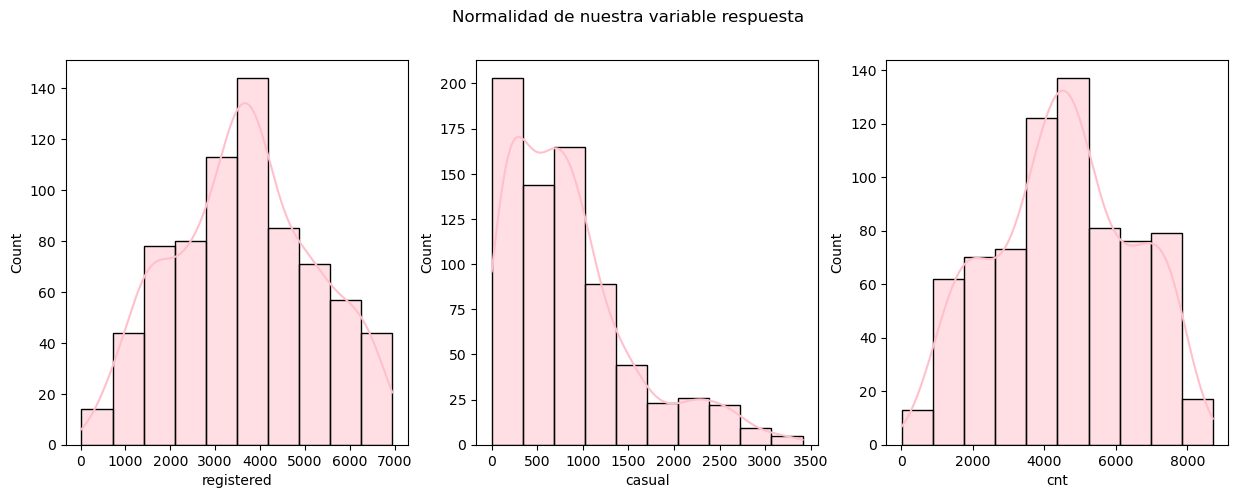

In [127]:
# Representación gráfica
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
# Título de la gráfica
fig.suptitle("Normalidad de nuestra variable respuesta")

# Cada uno de los histogramas
sns.histplot(df_registered["registered"], kde=True, bins=10, color='pink', ax=axes[0])
sns.histplot(df_casual["casual"], kde=True, bins=10, color='pink', ax=axes[1])
sns.histplot(df["cnt"], kde=True, bins=10, color='pink', ax=axes[2])

# Mostramos la figura
plt.show()

`Visualmente parece que la muestra 'registered' y 'cnt' siguen una distribución normal, se ajusta a una campana de Gauss, pero vamos a comprobarlo analíticamente.`

In [128]:
# Comprobación analítica para registered:
stats.shapiro(df_registered["registered"])

ShapiroResult(statistic=0.98438560962677, pvalue=5.023745757171127e-07)

In [129]:
# Comprobación analítica para casual:
stats.shapiro(df_casual["casual"])

ShapiroResult(statistic=0.8850967288017273, pvalue=7.660028716313278e-23)

In [130]:
# Comprobación analítica para cnt:
stats.shapiro(df["cnt"])

ShapiroResult(statistic=0.9802490472793579, pvalue=2.313480784721378e-08)

Si recordamos las hipótesis del test de normalidad: 

 - Hipótesis nula (H0): que nuestros datos siguen una distribución normal.

 - Hipótesis alternativa (H1): que nuestros datos no siguen una distribución normal.

- Si p-valor < 0.05 --> podemos rechazar H0 y por lo tanto nuestros datos no siguen una distribución normal.

- Si p-valor > 0.05 --> no podemos rechazar H0 y por lo tanto nuestros datos siguen una distribubción normal.

`Tenemos que ninguna de nuestras muestras sigue una distribución normal de los datos.`


### Asimetría:

La asimetría es la medida que indica la simetría de la distribución de una variable respecto a la media aritmética.

In [131]:
# Calculamos la media de cada una de las variables respuesta.
media_registered = df_registered["registered"].mean()
media_registered

3658.7575342465752

In [132]:
media_casual = df_casual["casual"].mean()
media_casual

849.2493150684932

In [133]:
media_cnt = df["cnt"].mean()
media_cnt

4508.006849315068

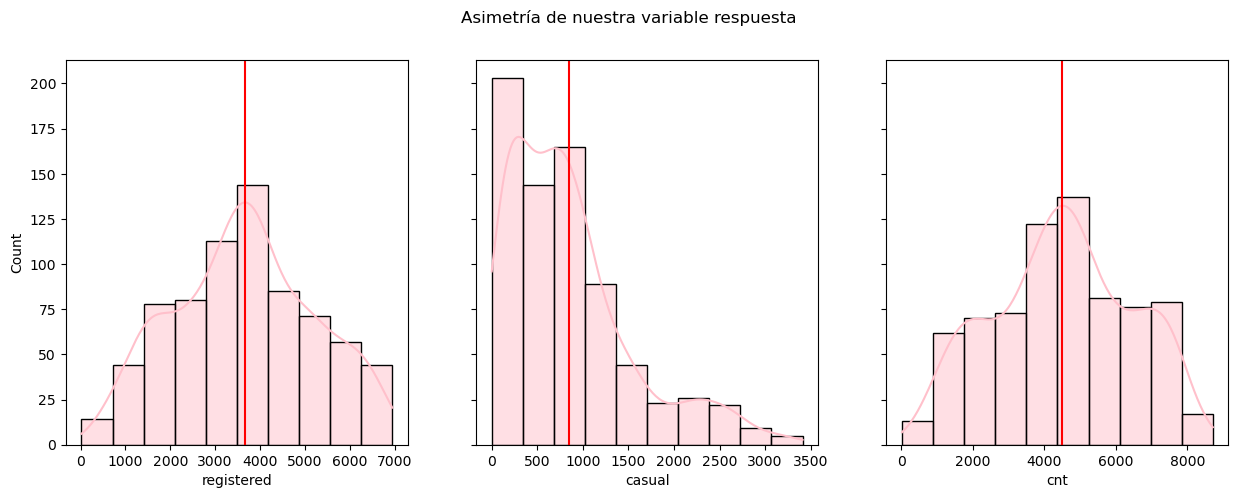

In [134]:
# Representación gráfica
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5), sharey=True)
# Título de la gráfica
fig.suptitle("Asimetría de nuestra variable respuesta")

# Cada uno de los histogramas
sns.histplot(df_registered["registered"], kde=True, bins=10, color='pink', ax=axes[0])
sns.histplot(df_casual["casual"], kde=True, bins=10, color='pink', ax=axes[1])
sns.histplot(df["cnt"], kde=True, bins=10, color='pink', ax=axes[2])

axes[0].axvline(media_registered, color="red")
axes[1].axvline(media_casual, color="red")
axes[2].axvline(media_cnt, color="red")

# Mostramos la figura
plt.show()

`Lo comprobamos analíticamente.`

In [135]:
skew(df_registered["registered"])

0.041126329274365096

In [136]:
skew(df_casual["casual"])

1.2637242136574607

In [137]:
skew(df["cnt"])

-0.049478668715917384

Podemos encontrarnos tres tipos de asimetría:

- Distribución simétrica: cuando el valor es de 0, y por lo tanto los datos tienen una distribución normal.

- Distribución asimétrica positiva: cuando el valor es positivo, los datos serán asimétricos positivos, y por lo tanto no tienen una distribución normal.

- Distribución asimétrica negativa: cuando el valor es negativo, los datos serán asimétricos negativos, y por lo tanto no tienen una distribución normal.

`Las distribuciones registered y cnt son asimétricas negativas y casual es asimétrica positiva.`

### Curtosis:

La curtosis es una medida que determina el grado de concentración que presentan los valores de una variable alrededor de la zona central de la distribución.

In [138]:
kurtosistest(df_registered["registered"])

KurtosistestResult(statistic=-6.230224997171458, pvalue=4.657657548695374e-10)

In [139]:
kurtosistest(df_casual["casual"])

KurtosistestResult(statistic=4.733437815879076, pvalue=2.2074861509736936e-06)

In [140]:
kurtosistest(df["cnt"])

KurtosistestResult(statistic=-7.8256016888838635, pvalue=5.0523461031270565e-15)

Podemos encontrarnos tres tipos de curtosis:

- Leptocurtosis: cuando el valor de la curtosis es mayor que 0.

- Mesocurtosis: cuando el valor de la curtosis es igual a 0.

- Platicurtosis: cuando el valor de la curtosis es menor que 0.

`Las distribuciones registered y cnt son platicúrticas y casual es leptocúrtica.`

|   | registered | casual | cnt |
| --- | --- | --- | --- |
| Normalidad | No | No | No |
| Independencia |  |  |  |
| Homogeneidad varianzas |  |  |  |

## Asunción de independencia:

## Asunción de homogeneidad de las varianzas (homocedasticidad):

Significa que las varianzas no varían entre los diferentes niveles de las variables.

Para el análisis visual de homocedasticidad para las variables categóricas utilizaremos el gráfico boxplot.

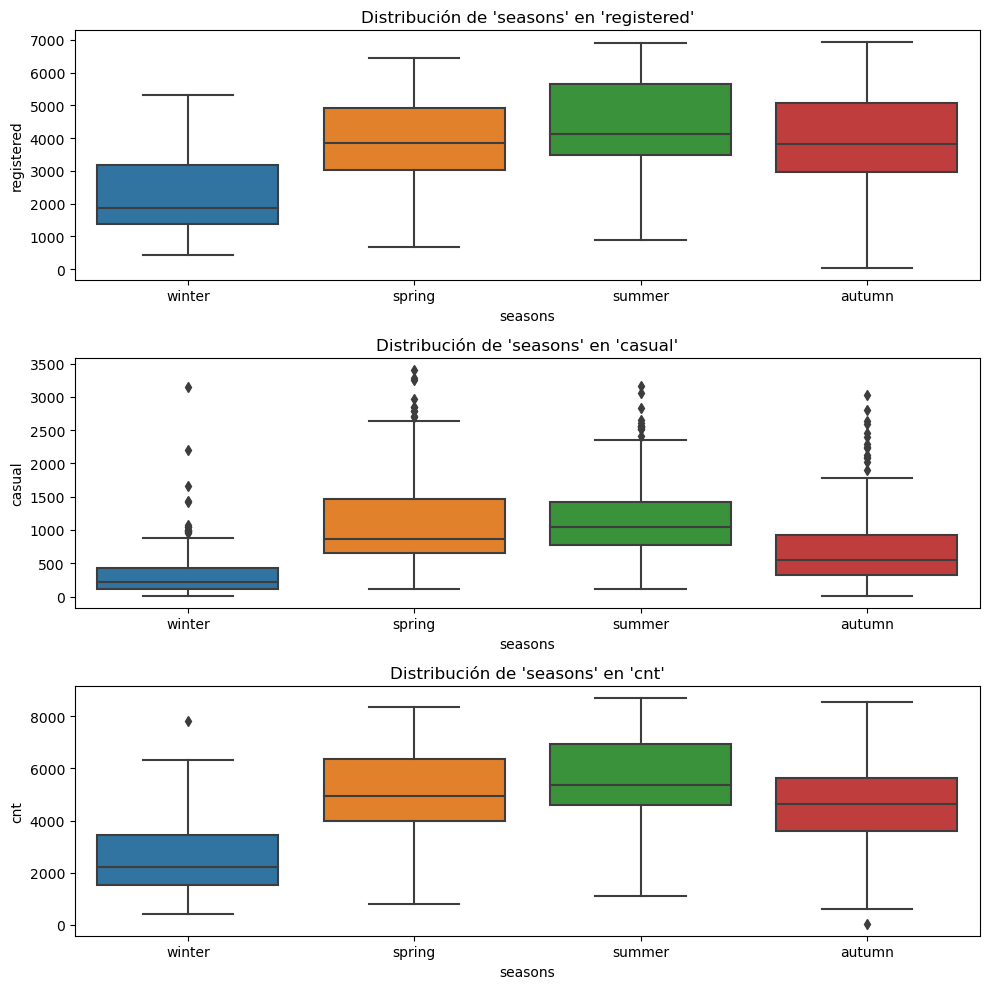

In [141]:
# Representación gráfica
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(10,10))

sns.boxplot(x="seasons", y="registered", data=df_registered, ax=axes[0])
sns.boxplot(x="seasons", y="casual", data=df_casual, ax=axes[1])
sns.boxplot(x="seasons", y="cnt", data=df, ax=axes[2])

axes[0].set_title("Distribución de 'seasons' en 'registered'")
axes[1].set_title("Distribución de 'seasons' en 'casual'")
axes[2].set_title("Distribución de 'seasons' en 'cnt'")

fig.tight_layout()

plt.show()

`Visualmente las medianas no son similares, pero vamos a comprobarlo analíticamente.`

Usaremos el test de Levene.

In [152]:
# Nos creamos un dataframe para cada una de las categorías de registered
winter_df_registered = df_registered[df_registered["seasons"] == "winter"]["registered"]
spring_df_registered = df_registered[df_registered["seasons"] == "spring"]["registered"]
summer_df_registered = df_registered[df_registered["seasons"] == "summer"]["registered"]
autumn_df_registered = df_registered[df_registered["seasons"] == "autumn"]["registered"]

In [153]:
stats.levene(winter_df_registered, spring_df_registered, summer_df_registered, autumn_df_registered, center="median")

LeveneResult(statistic=1.528787727275075, pvalue=0.20569008595675392)

In [154]:
# Nos creamos un dataframe para cada una de las categorías de registered
winter_df_casual = df_casual[df_casual["seasons"] == "winter"]["casual"]
spring_df_casual = df_casual[df_casual["seasons"] == "spring"]["casual"]
summer_df_casual = df_casual[df_casual["seasons"] == "summer"]["casual"]
autumn_df_casual = df_casual[df_casual["seasons"] == "autumn"]["casual"]

In [155]:
stats.levene(winter_df_casual, spring_df_casual, summer_df_casual, autumn_df_casual, center="median")

LeveneResult(statistic=14.648752415833686, pvalue=2.8542455250698467e-09)

In [156]:
# Nos creamos un dataframe para cada una de las categorías de cnt
winter_df = df[df["seasons"] == "winter"]["cnt"]
spring_df = df[df["seasons"] == "spring"]["cnt"]
summer_df = df[df["seasons"] == "summer"]["cnt"]
autumn_df = df[df["seasons"] == "autumn"]["cnt"]

In [157]:
stats.levene(winter_df, spring_df, summer_df, autumn_df, center="median")

LeveneResult(statistic=3.155040941439281, pvalue=0.024303690914594712)

Si recordamos las hipótesis del test de homogeneidad de varianzas: 

 - Hipótesis nula (H0): las varianzas son iguales (homocedasticidad)

 - Hipótesis alternativa (H1): las varianzas son distintas (heterocedasticidad)

- Si p-valor < 0.05 --> podemos rechazar H0 y por lo tanto nuestros datos son heterocedasticos. 

- Si p-valor > 0.05 --> aceptamos H0 y por lo tanto nuestros datos son homocedasticos.


`Los datos de registered son homocedasticos, y los datos de casual y cnt son heterocedasticos, solo para la columna categórica de 'seasons'.`

Para el análisis visual de homocedasticidad para las variables numéricas utilizaremos el gráfico regplot.

In [158]:
# Creamos un dataframe solo con las columnas numéricas
df_registered_numericas = df_registered.select_dtypes(include=np.number).drop(["registered", "cnt"], axis=1)

In [159]:
df_casual_numericas = df_casual.select_dtypes(include=np.number).drop(["casual", "cnt"], axis=1)

In [160]:
df_numericas = df.select_dtypes(include=np.number).drop(["cnt"], axis=1)

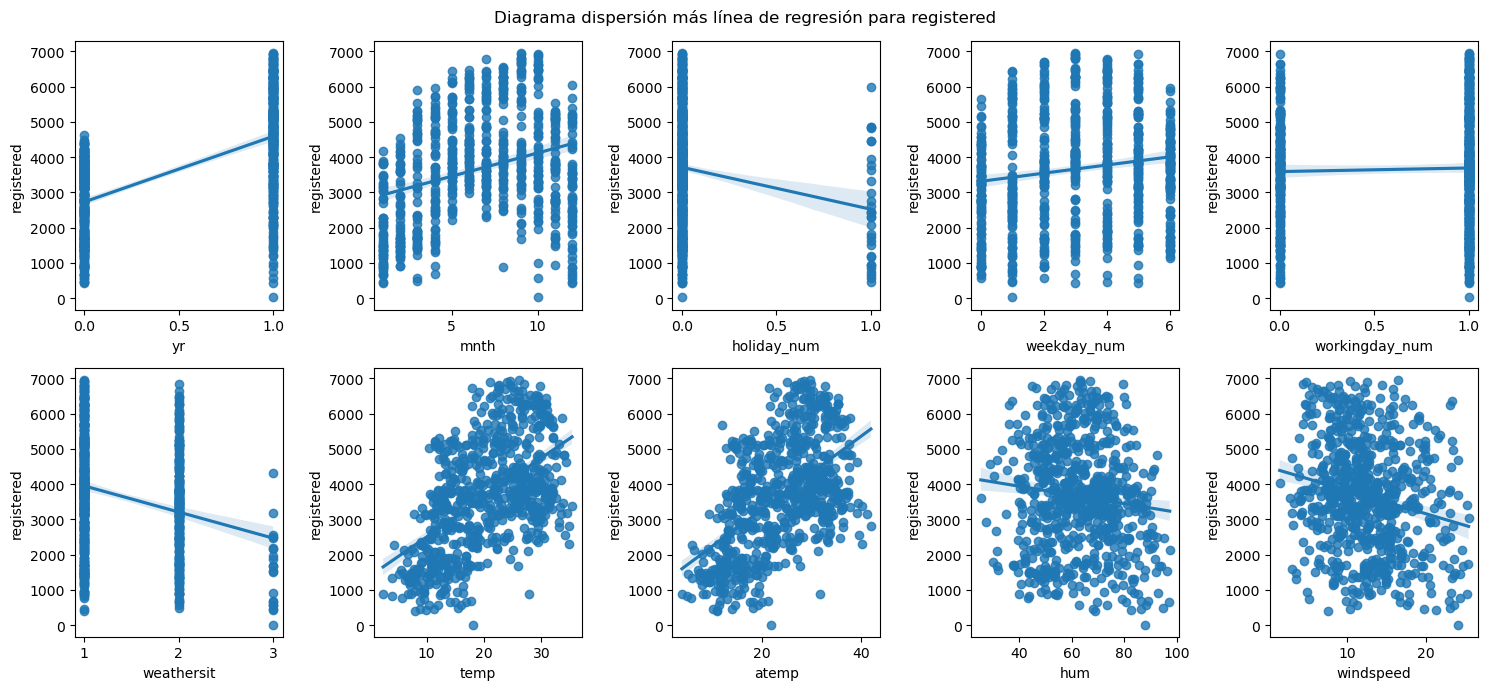

In [161]:
# Representación gráfica
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,7))
fig.suptitle("Diagrama dispersión más línea de regresión para registered")

# Aplanamos los ejes
axes = axes.flat

for i, columna in enumerate(df_registered_numericas.columns):
    sns.regplot(data=df_registered, x=columna, y="registered", ax=axes[i])

fig.tight_layout()

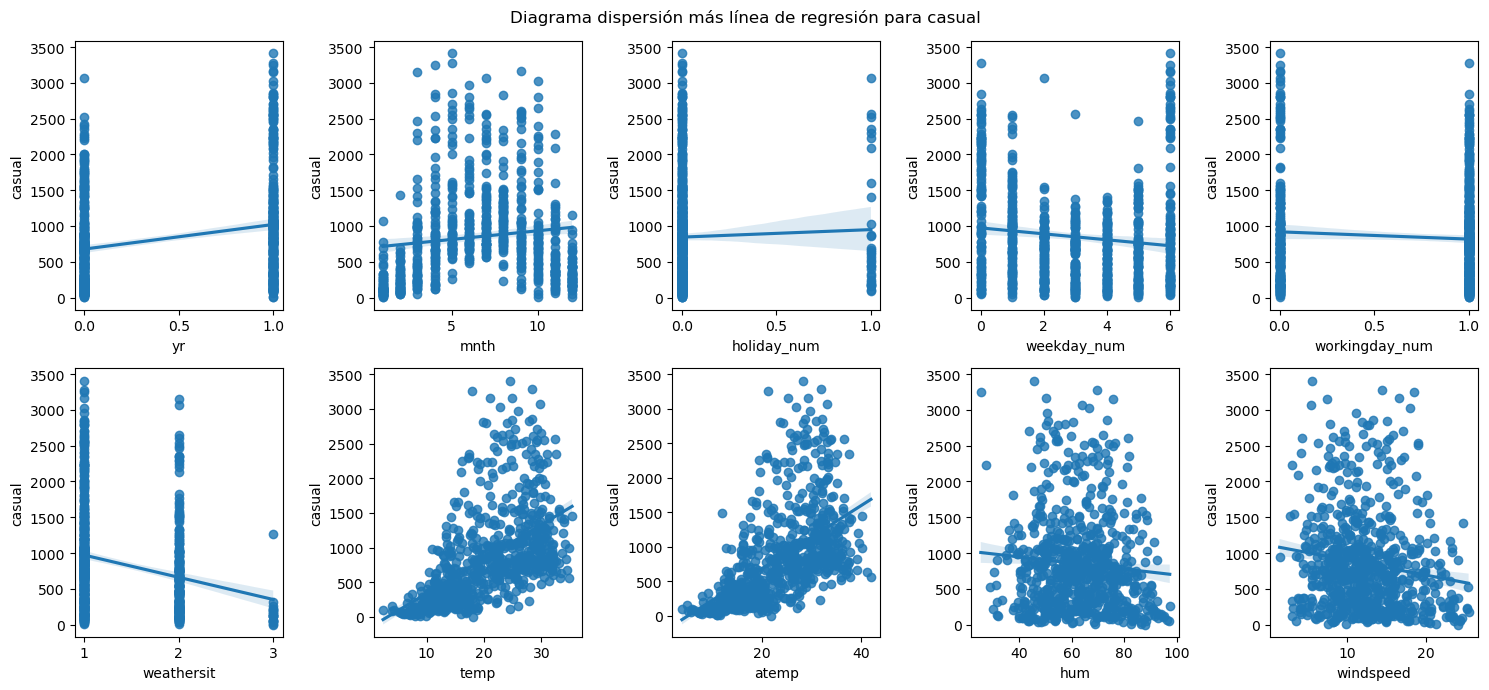

In [162]:
# Representación gráfica
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(15,7))
fig.suptitle("Diagrama dispersión más línea de regresión para casual")

# Aplanamos los ejes
axes = axes.flat

for i, columna in enumerate(df_casual_numericas.columns):
    sns.regplot(data=df_casual, x=columna, y="casual", ax=axes[i])

fig.tight_layout()

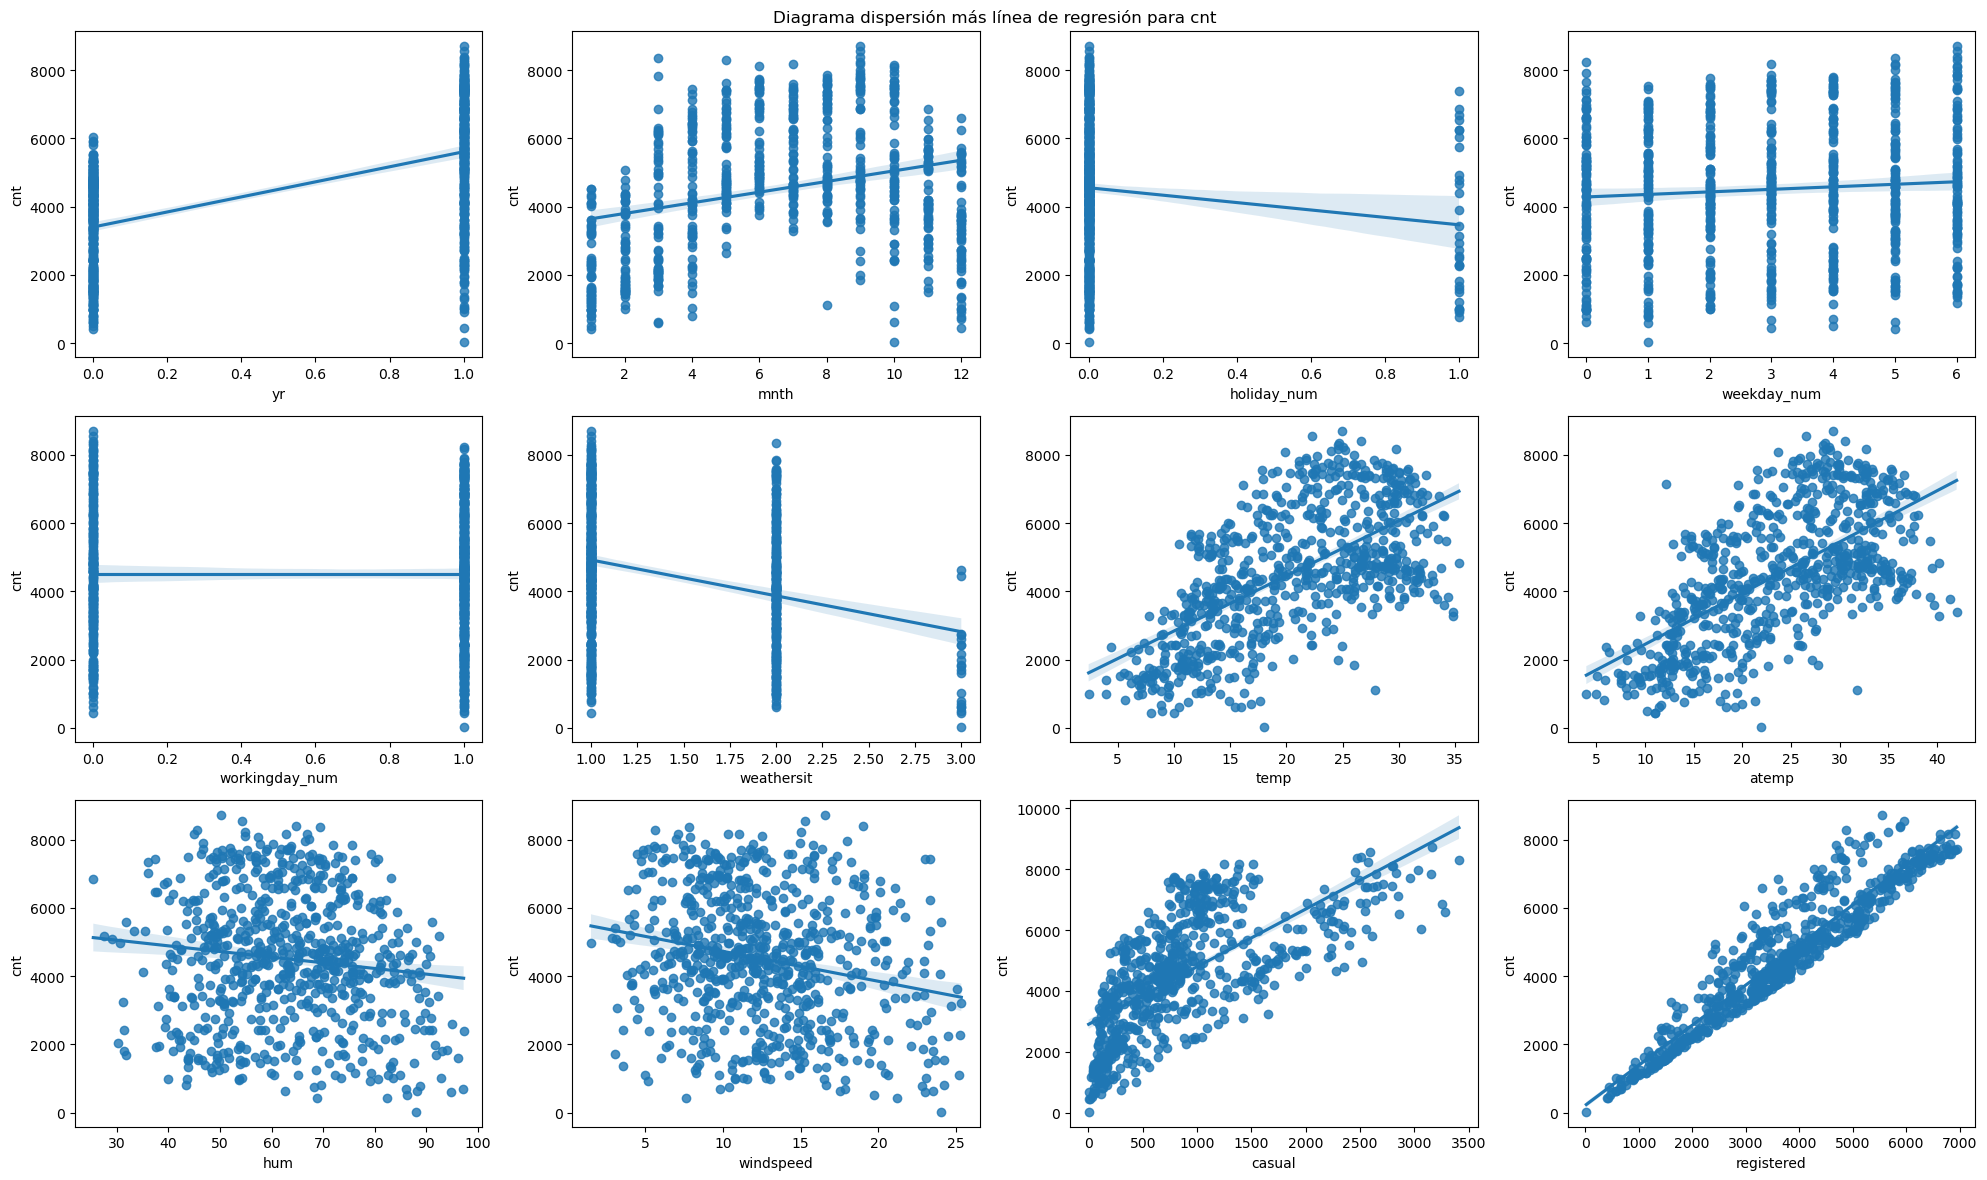

In [163]:
# Representación gráfica
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20,12))
fig.suptitle("Diagrama dispersión más línea de regresión para cnt")

# Aplanamos los ejes
axes = axes.flat

for i, columna in enumerate(df_numericas.columns):
    sns.regplot(data=df, x=columna, y="cnt", ax=axes[i])

fig.tight_layout()

`Vamos a comprobarlo analíticamente.`

In [164]:
# Creamos un diccionario para almacenar los resultados del test Levene para la columna 'registered'
resultados_levene_registered = {}

for columna in df_registered_numericas.columns:
    statistic, pvalue = stats.levene(df_registered_numericas[columna], df_registered["registered"], center="median")
    resultados_levene_registered[columna] = {'statistic': statistic, 'pvalue': pvalue}
    print(f"Para la columna {columna} el test de Levene es {resultados_levene_registered[columna]}")

Para la columna yr el test de Levene es {'statistic': 1391.62642320088, 'pvalue': 2.0613085773359724e-214}
Para la columna mnth el test de Levene es {'statistic': 1386.1386633194024, 'pvalue': 8.411490920240263e-214}
Para la columna holiday_num el test de Levene es {'statistic': 1392.6322963836633, 'pvalue': 1.593410395296977e-214}
Para la columna weekday_num el test de Levene es {'statistic': 1388.9439202253832, 'pvalue': 4.0976049523854276e-214}
Para la columna workingday_num el test de Levene es {'statistic': 1392.0308127192602, 'pvalue': 1.858597358336471e-214}
Para la columna weathersit el test de Levene es {'statistic': 1391.8585021383146, 'pvalue': 1.9424105633260445e-214}
Para la columna temp el test de Levene es {'statistic': 1378.336128066554, 'pvalue': 6.240911065291662e-213}
Para la columna atemp el test de Levene es {'statistic': 1377.2599302990022, 'pvalue': 8.231638671229998e-213}
Para la columna hum el test de Levene es {'statistic': 1367.4005549397343, 'pvalue': 1.0451

In [165]:
# Creamos un diccionario para almacenar los resultados del test Levene para la columna 'casual'
resultados_levene_casual = {}

for columna in df_casual_numericas.columns:
    statistic, pvalue = stats.levene(df_casual_numericas[columna], df_casual["casual"], center="median")
    resultados_levene_casual[columna] = {'statistic': statistic, 'pvalue': pvalue}
    print(f"Para la columna {columna} el test de Levene es {resultados_levene_casual[columna]}")

Para la columna yr el test de Levene es {'statistic': 803.9833480165022, 'pvalue': 3.16613979225668e-141}
Para la columna mnth el test de Levene es {'statistic': 796.0773770995605, 'pvalue': 4.0777022810431975e-140}
Para la columna holiday_num el test de Levene es {'statistic': 805.4343471147912, 'pvalue': 1.9826834424171372e-141}
Para la columna weekday_num el test de Levene es {'statistic': 800.1163655348347, 'pvalue': 1.103854929631097e-140}
Para la columna workingday_num el test de Levene es {'statistic': 804.5663842511905, 'pvalue': 2.6232175579606733e-141}
Para la columna weathersit el test de Levene es {'statistic': 804.3177535110577, 'pvalue': 2.8423017397675974e-141}
Para la columna temp el test de Levene es {'statistic': 784.8712217983035, 'pvalue': 1.5499266458859592e-138}
Para la columna atemp el test de Levene es {'statistic': 783.326909835361, 'pvalue': 2.5624550307428922e-138}
Para la columna hum el test de Levene es {'statistic': 769.2131985592741, 'pvalue': 2.577337389

In [166]:
# Creamos un diccionario para almacenar los resultados del test Levene para la columna 'cnt'
resultados_levene_cnt = {}

for columna in df_numericas.columns:
    statistic, pvalue = stats.levene(df_numericas[columna], df["cnt"], center="median")
    resultados_levene_cnt[columna] = {'statistic': statistic, 'pvalue': pvalue}
    print(f"Para la columna {columna} el test de Levene es {resultados_levene_cnt[columna]}")

Para la columna yr el test de Levene es {'statistic': 1456.4852165805114, 'pvalue': 1.5274213964794415e-221}
Para la columna mnth el test de Levene es {'statistic': 1451.894476997643, 'pvalue': 4.823769876689766e-221}
Para la columna holiday_num el test de Levene es {'statistic': 1457.326615643387, 'pvalue': 1.2373947865502715e-221}
Para la columna weekday_num el test de Levene es {'statistic': 1454.241307822497, 'pvalue': 2.679018861126402e-221}
Para la columna workingday_num el test de Levene es {'statistic': 1456.823535667829, 'pvalue': 1.4034088907459814e-221}
Para la columna weathersit el test de Levene es {'statistic': 1456.679418218955, 'pvalue': 1.4549531050765028e-221}
Para la columna temp el test de Levene es {'statistic': 1445.3655021242073, 'pvalue': 2.4833393575116467e-220}
Para la columna atemp el test de Levene es {'statistic': 1444.4652108057878, 'pvalue': 3.113811502846707e-220}
Para la columna hum el test de Levene es {'statistic': 1436.2161305649756, 'pvalue': 2.4831